## Smoothing Edges in an Image: Gaussian Filter

Applying a Gaussian filter reduces the image's high frequency components. Thus, it is called a low pass filter. It is often used to remove Gaussian (random) noise from the image. Skimage.filters module has a function called gaussian() that employs this feature on images. It takes a parameter called sigma that determines how much of the noise will be removed. Larger sigma values may remove more noise, but they will also remove more details from the image.

(-0.5, 899.5, 719.5, -0.5)

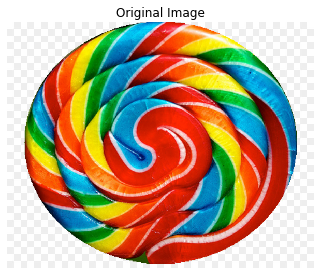

In [1]:
#Importing necessary libraries
import skimage.io
import matplotlib.pyplot as plt
import skimage.filters
from skimage.util import random_noise 
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral

#Loading the image
candy = skimage.io.imread(fname='candy.jpg')
#Displaying the image
skimage.io.imshow(candy)
plt.title('Original Image')
plt.axis('off')

Let's apply a Gaussian filter to the candy image:

(-0.5, 899.5, 719.5, -0.5)

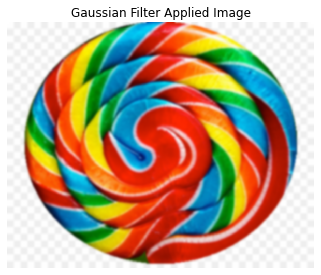

In [2]:
gauss_blurred = skimage.filters.gaussian(candy, sigma=(3,3), truncate=3.5,multichannel=True)
skimage.io.imshow(gauss_blurred)
plt.title('Gaussian Filter Applied Image')
plt.axis('off')

We observe that the sharpness of the image is reduced and colors blend in more. 

## Adding Noise to an Image:
We can add noise to an image using skimage. Here, we will add random noise to a landscape image using Gaussian, Salt & Pepper and Poisson distributions.

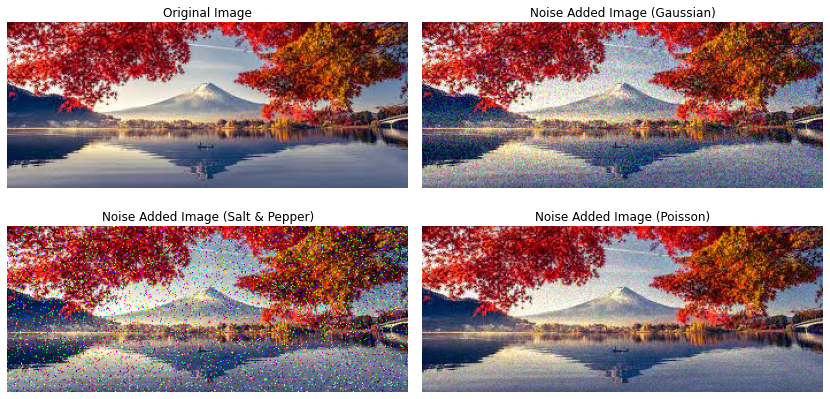

In [3]:
#Adding noise to an image:
land = skimage.io.imread('land.jpg')
#Add Gaussian noise:
g_noised_image = random_noise(land, mode='gaussian')
#Add salt&pepper noise:
sp_noised_image = random_noise(land, mode='s&p', amount=0.09)
#Add Poisson noise:
poisson_noised_image =random_noise(land, mode='poisson')
#Plot all noised images with the original image:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(12,6), sharex=True, sharey=True, squeeze=True)
ax = ax.ravel()
ax[0].imshow(land)
ax[0].set_title('Original Image')
ax[1].imshow(g_noised_image)
ax[1].set_title('Noise Added Image (Gaussian)')
ax[2].imshow(sp_noised_image)
ax[2].set_title('Noise Added Image (Salt & Pepper)')
ax[3].imshow(poisson_noised_image)
ax[3].set_title('Noise Added Image (Poisson)')
fig.tight_layout()
for a in ax:
    a.axis('off')

## Removing Noise from an Image:
We learned how to add noise to an image. Let's learn how to get rid of it too. 
The Gaussian smoothing filter mentioned above can denoise an image, but it also blurs the edges. 
Here, we will use two techniques to denoise an image: <b>Total Variation (TV)</b> and <b>Bilateral</b>.
TV has the ability to remove noise from the image without blurring its edges, however this comes at the expense of contrast loss.
Bilateral filter is also great at reducing the noise while preserving edges, but it may produce cartoonish looking images. 
In the following, we will use the Gaussian noise added image from the above and apply TV and Bilateral filters to it. 

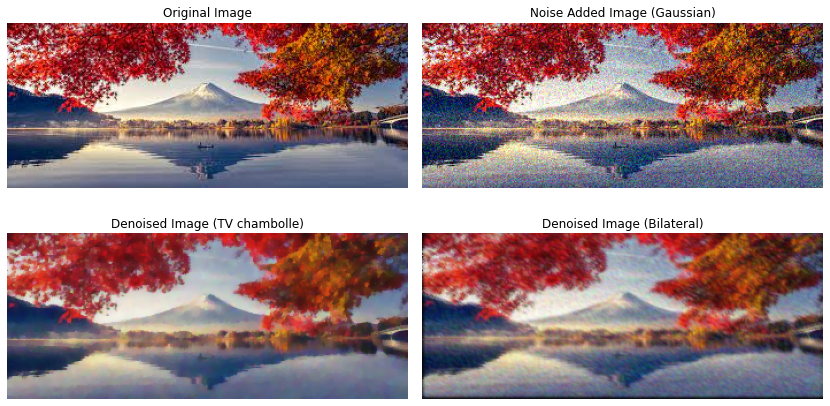

In [4]:
#Remove random noise by using Total Variation:
denoised_image_tv = denoise_tv_chambolle(g_noised_image, multichannel=True)
#Remove random noise by using Bilateral:
denoised_image_bilateral = denoise_bilateral(g_noised_image, multichannel=True)
#Plot original, noised, and denoised images:
fig, ax = plt.subplots(2,2, figsize=(12, 6), sharey=True)
ax = ax.ravel()
ax[0].imshow(land)
ax[0].set_title('Original Image')
ax[1].imshow(g_noised_image)
ax[1].set_title('Noise Added Image (Gaussian)')
ax[2].imshow(denoised_image_tv)
ax[2].set_title('Denoised Image (TV chambolle)')
ax[3].imshow(denoised_image_bilateral)
ax[3].set_title('Denoised Image (Bilateral)')
fig.tight_layout()
for a in ax:
    a.axis('off')

As we can see, we achieved noise reduction with both techniques, maybe more so with TV filter. However, TV applied image has less contrast compared to the original and Bilateral filter applied image looks very distorted to the point where it doesn't look real any more.